In [68]:
#import modules
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from specutils import Spectrum1D
import pyfits
import astropy.units as u

# Functions

In [2]:
# This function uses the Doppler equivalency between wavelength and velocity

def wave2vel(w, w0):
# input wavelengths should be in units of wavelengths, e.g. u.nm
# w0 should be in units of wavlength, e.g. u.nm
    w0_equiv = u.doppler_optical(w0)
    v_equiv = w.to(u.km/u.s, equivalencies=w0_equiv)
    return v_equiv

# and the same thing the other way around (vel to wl)
def vel2wave(v, w0):
# input velocity should be in units of velocity, e.g. u.km/u.s
# w0 should be in units of wavlength, e.g. u.nm
# OUTPUT IS IN nm!!!!
    w0_equiv = u.doppler_optical(w0)
    w_equiv = v.to(u.nm, equivalencies=w0_equiv)
    return w_equiv

In [3]:
## function to put in range of wavelengths, get correct array of wavelength and flux out to plot

def vel_flux_arrays(wave_cen,w_min,w_max,wave_data,flux_data):
    #inputs:
        #w_min,w_max - the mininmum and maximum wavelengths for the array
        #wave_center - wavelength of the line
        #wave_data - the array of wave values for the given data set
        #flux_data - the array of flux values for the given data set
    #outputs:
        #correct arrays for plotting the flux/velocity plots for a specific line
    
    #create array of wavelengths in desired region
    line_waves = np.asarray(wave_data[np.where((wave_data >= w_min) & (wave_data <= w_max))])
    #convert to velocity
    line_vel = wave2vel(line_waves*u.AA,wave_cen*u.AA)
    #corresponding region of array for flux
    line_flux = flux_data[np.where((wave_data >= w_min) & (wave_data <= w_max))]
    
    #transpose the velocity to have the same shape as the flux array
    line_vel = np.transpose(line_vel)
    
    #print(line_vel,line_flux)
    
    return line_vel,line_flux
    

In [123]:
#function to plot flux of line as a function of wavelength
def wavelength_plots(wave_cen,w_min,w_max,wave_data,flux_data,label):
    #inputs:
        #w_min,w_max - the mininmum and maximum wavelengths for the array
        #wave_data - the array of wave values for the given data set
        #flux_data - the array of flux values for the given data set
        #label - string label for the legend
    #outputs:
        #plots
        
    #create array of wavelengths in desired region
    line_waves = np.asarray(wave_data[np.where((wave_data >= w_min) & (wave_data <= w_max))])
    #corresponding region of array for flux
    line_flux = flux_data[np.where((wave_data >= w_min) & (wave_data <= w_max))]
    
    #plot
    plt.plot(line_waves,line_flux,label=label)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Flux (erg/cm2/s/A)')
    
    return


#function to plot flux of line as a function of wavelength
def velocity_plots(wave_cen,w_min,w_max,wave_data,flux_data,label):
    
    vel_data,flux_data = vel_flux_arrays(wave_cen,w_min,w_max,wave_data,flux_data)
    
    plt.plot(vel_data,flux_data,label=label)
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Flux (erg/cm2/s/A)')
    
    return

def both_plots(wave_cen,w_min,w_max,wave_data,flux_data,label):
    
    #create array of wavelengths in desired region
    line_waves = np.asarray(wave_data[np.where((wave_data >= w_min) & (wave_data <= w_max))])
    #corresponding region of array for flux
    line_flux = flux_data[np.where((wave_data >= w_min) & (wave_data <= w_max))]
    
    #calculate velocity
    vel_data,flux_data = vel_flux_arrays(wave_cen,w_min,w_max,wave_data,flux_data)
    
    ##2 subplots with wavelength on the left and velocity on the right 
    fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True,figsize=(10,6))
    #fig.suptitle('Horizontally stacked subplots')
    ax1.plot(line_waves, line_flux,label=label)
    ax1.set_xlabel("Wavelength (AA)")
    ax1.set_ylabel("Flux (erg/cm2/s/A)")
    
    ax2.plot(vel_data,flux_data,label=label)
    ax2.set_xlabel("Velocity(km/s)")
    
    legend = ax1.legend(loc='upper left',fontsize='medium')
    
    return

def multi_data_3(wave_cen,w_min,w_max,wave_data1,flux_data1,label1,wave_data2,flux_data2,label2,
              wave_data3,flux_data3,label3):
    
    #create array of wavelengths in desired region
    line_waves = np.asarray(wave_data1[np.where((wave_data1 >= w_min) & (wave_data1 <= w_max))])
    line_waves2 = np.asarray(wave_data2[np.where((wave_data2 >= w_min) & (wave_data2 <= w_max))])
    line_waves3 = np.asarray(wave_data3[np.where((wave_data3 >= w_min) & (wave_data3 <= w_max))])
    #corresponding region of array for flux
    line_flux1 = flux_data1[np.where((wave_data1 >= w_min) & (wave_data1 <= w_max))]
    line_flux2 = flux_data2[np.where((wave_data2 >= w_min) & (wave_data2 <= w_max))]
    line_flux3 = flux_data3[np.where((wave_data3 >= w_min) & (wave_data3 <= w_max))]
    
    #calculate velocity
    vel_data1,flux_data1 = vel_flux_arrays(wave_cen,w_min,w_max,wave_data1,flux_data1)
    vel_data2,flux_data2 = vel_flux_arrays(wave_cen,w_min,w_max,wave_data2,flux_data2)
    vel_data3,flux_data3 = vel_flux_arrays(wave_cen,w_min,w_max,wave_data3,flux_data3)
    
    ##2 subplots with wavelength on the left and velocity on the right 
    fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True,figsize=(10,6))
    #fig.suptitle('Horizontally stacked subplots')
    ax1.plot(line_waves, line_flux1,label=label1)
    ax1.plot(line_waves2, line_flux2,label=label2)
    ax1.plot(line_waves3, line_flux3,label=label3)
    ax1.set_xlabel("Wavelength (AA)")
    ax1.set_ylabel("Flux (erg/cm2/s/A)")
    
    ax2.plot(vel_data1,flux_data1)
    ax2.plot(vel_data2,flux_data2)
    ax2.plot(vel_data3,flux_data3)
    
    ax2.set_xlabel("Velocity(km/s)")
    
    legend = ax1.legend(loc='upper left',fontsize='medium')
    
    return

# X-Shooter

### SO518


In [5]:
spec_uv_518 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO518_uvb.fits',format='wcs1d-fits')
spec_vis_518 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO518_vis_tell.fits',format='wcs1d-fits')
spec_nir_518 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO518_nir_tell.fits',format='wcs1d-fits')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [6]:
uv_wave_518 = np.array(spec_uv_518.wavelength)
uv_flux_518 = np.array(spec_uv_518.flux)

vis_wave_518 = np.array(spec_vis_518.wavelength)
vis_flux_518 = np.array(spec_vis_518.flux)

nir_wave_518 = np.array(spec_nir_518.wavelength)
nir_flux_518 = np.array(spec_nir_518.flux)

xs_wave_518 = np.concatenate((uv_wave_518,vis_wave_518,nir_wave_518))
xs_flux_518 = np.concatenate((uv_flux_518,vis_flux_518,nir_flux_518))

Text(0, 0.5, 'Flux (erg/cm2/s/A)')

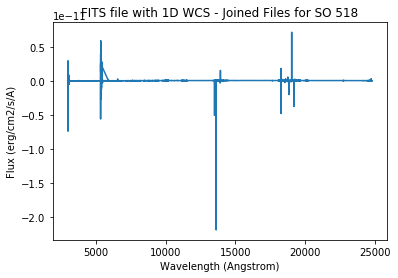

In [7]:
plt.plot(xs_wave_518,xs_flux_518)
plt.title('FITS file with 1D WCS - Joined Files for SO 518')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm2/s/A)')

### SO 583

In [8]:
spec_uv_583 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO583_uvb.fits',format='wcs1d-fits')
spec_vis_583 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO583_vis_tell.fits',format='wcs1d-fits')
spec_nir_583 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO583_nir_tell.fits',format='wcs1d-fits')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [9]:
uv_wave_583 = np.array(spec_uv_583.wavelength)
uv_flux_583 = np.array(spec_uv_583.flux)

vis_wave_583 = np.array(spec_vis_583.wavelength)
vis_flux_583 = np.array(spec_vis_583.flux)

nir_wave_583 = np.array(spec_nir_583.wavelength)
nir_flux_583 = np.array(spec_nir_583.flux)

xs_wave_583 = np.concatenate((uv_wave_583,vis_wave_583,nir_wave_583))
xs_flux_583 = np.concatenate((uv_flux_583,vis_flux_583,nir_flux_583))

Text(0, 0.5, 'Flux (erg/cm2/s/A)')

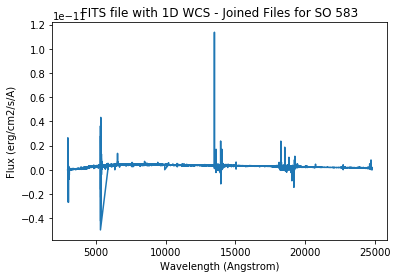

In [10]:
plt.plot(xs_wave_583,xs_flux_583)
plt.title('FITS file with 1D WCS - Joined Files for SO 583')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm2/s/A)')

### SO 1153

In [11]:
spec_uv_1153 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO1153_uvb.fits',format='wcs1d-fits')
spec_vis_1153 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO1153_vis_tell.fits',format='wcs1d-fits')
spec_nir_1153 = Spectrum1D.read('699-1_Project/data_red_XS/flux_SO1153_nir_tell.fits',format='wcs1d-fits')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [12]:
uv_wave_1153 = np.array(spec_uv_1153.wavelength)
uv_flux_1153 = np.array(spec_uv_1153.flux)

vis_wave_1153 = np.array(spec_vis_1153.wavelength)
vis_flux_1153 = np.array(spec_vis_1153.flux)

nir_wave_1153 = np.array(spec_nir_1153.wavelength)
nir_flux_1153 = np.array(spec_nir_1153.flux)

xs_wave_1153 = np.concatenate((uv_wave_1153,vis_wave_1153,nir_wave_1153))
xs_flux_1153 = np.concatenate((uv_flux_1153,vis_flux_1153,nir_flux_1153))

Text(0, 0.5, 'Flux (erg/cm2/s/A)')

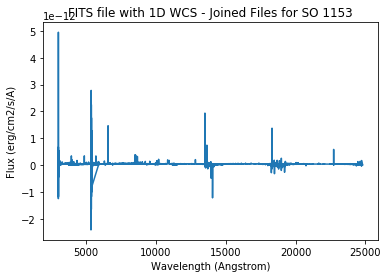

In [13]:
plt.plot(xs_wave_1153,xs_flux_1153)
plt.title('FITS file with 1D WCS - Joined Files for SO 1153')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm2/s/A)')

#### Different lines of interest

Text(0.5, 0.98, 'H-alpha')

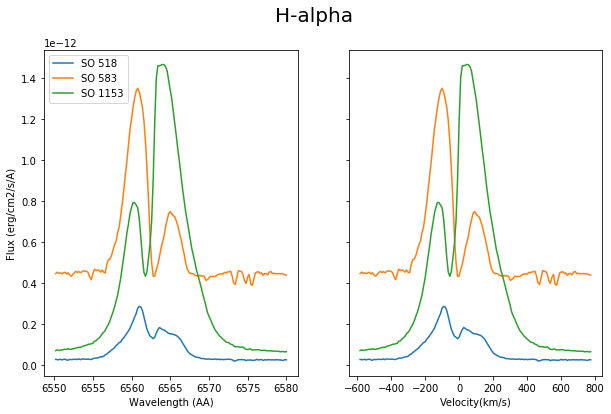

In [72]:
multi_data_3(6563,6550,6580,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",
            xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle("H-alpha",fontsize=20)

comments for above:
* 518 doens't seem to have a strong h alpha feature
* 583 and 1153 both have features, but they are quite broad, and also have different p cygni profiles from each other

Text(0.5, 0.98, '[OI]')

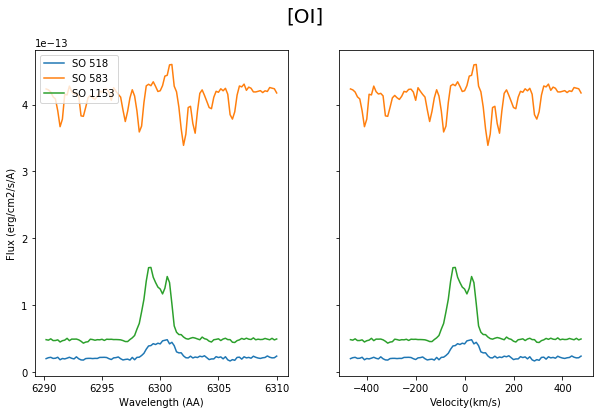

In [73]:
### [OI], for the different velocity components, low traces the disk surface and high arises in jet close to the star (wind?)
multi_data_3(6300,6290,6310,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",
            xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle("[OI]",fontsize=20)

Comments for above:
* clearly see a 2 peak feature in both 583 and 1153

Text(0.5, 0.98, 'H-beta')

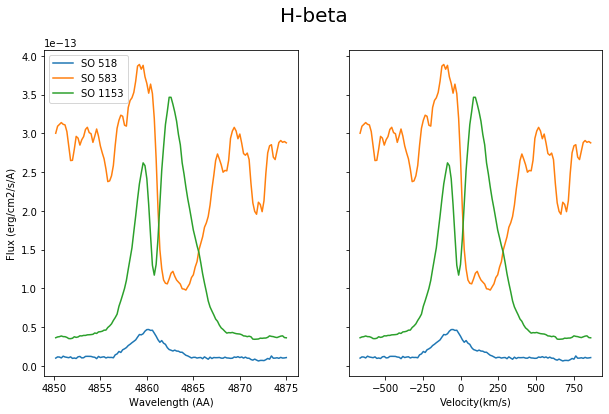

In [74]:
#h beta line
multi_data_3(4861,4850,4875,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle("H-beta",fontsize=20)

one interesting feature here to note is the very different spectral feature shape from so583 and so1153

Text(0.5, 0.98, 'HeI5876')

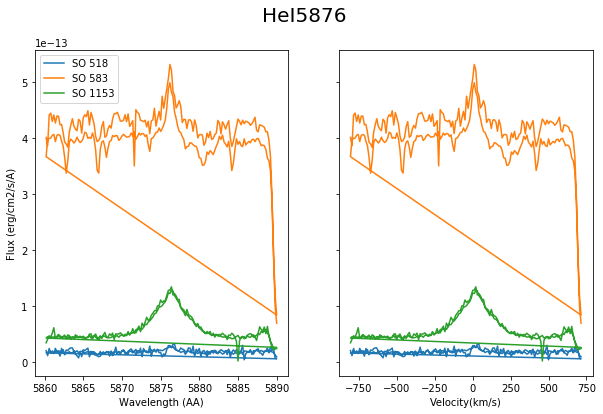

In [75]:
#HeI5876
multi_data_3(5876,5860,5890,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle("HeI5876",fontsize=20)

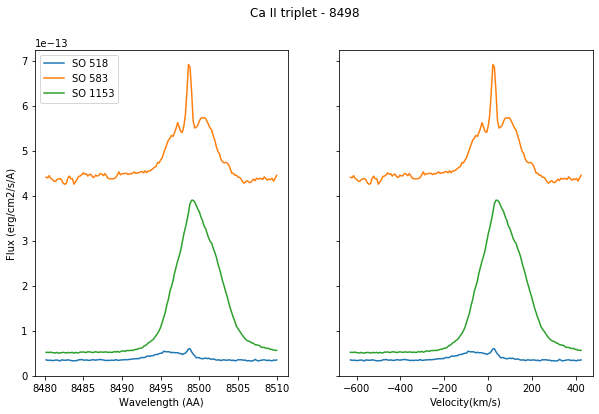

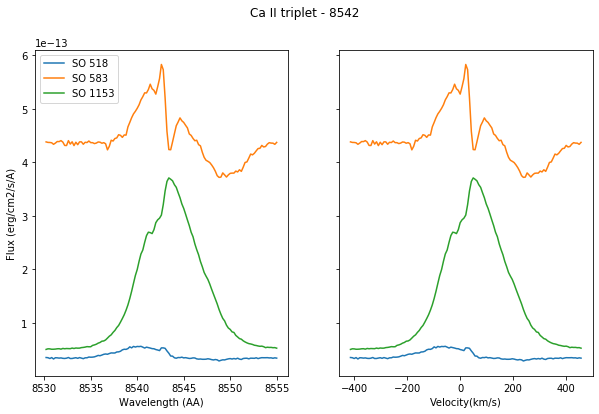

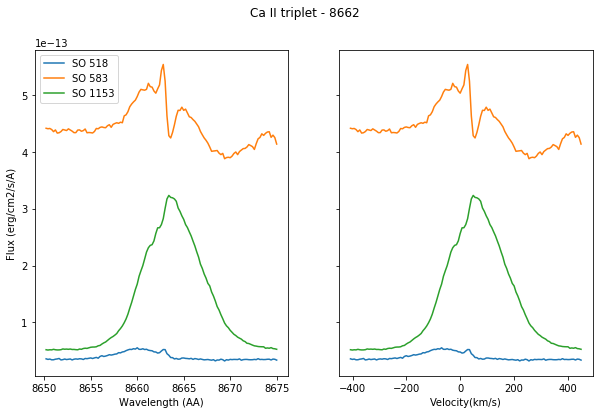

In [71]:
##Ca IRT

#8498
multi_data_3(8498,8480,8510,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle('Ca II triplet - 8498')
plt.show()
#8542
multi_data_3(8542,8530,8555,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle('Ca II triplet - 8542')
plt.show()
#8662
multi_data_3(8662,8650,8675,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle('Ca II triplet - 8662')
plt.show()

Text(0.5, 0.98, 'Brackett Gamma')

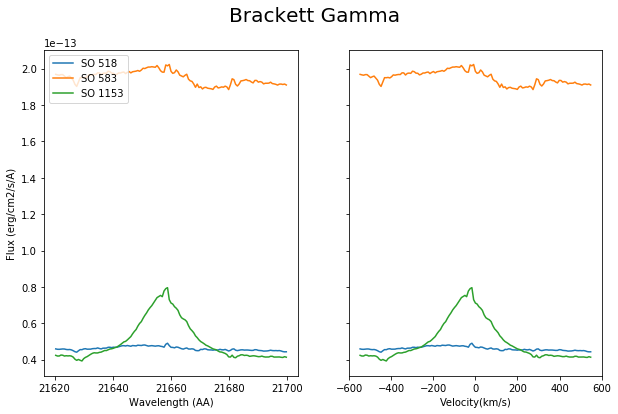

In [78]:
### Brackett - Gamma , traces the radiation on the inner disk
multi_data_3(21660,21620,21700,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle("Brackett Gamma",fontsize=20)

Note strong feature for SO 1153

Text(0.5, 0.98, '[NI]6583')

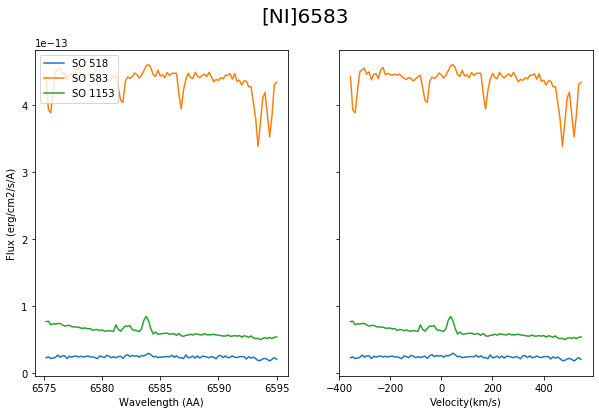

In [92]:
#NI feature
multi_data_3(6583,6575,6595,xs_wave_518,xs_flux_518,"SO 518",xs_wave_583,xs_flux_583,"SO 583",xs_wave_1153,xs_flux_1153,"SO 1153")
plt.suptitle('[NI]6583',fontsize=20)

hard to decern features in the lower resolution-- looks better in ESPRESSO/UVES

# ESPRESSO

## Function for reading ESPRESSO data

In [79]:
def readspec_espresso_air(file,err_out='NO',hdr_out='NO'):
# USAGE:
# wl,fl[,err,hdr] = readspec_espresso(filename[,err_out='YES',hdr_out='YES'])
    hdu = pyfits.open(file)
    hdr = hdu[0].header
    #global wave
    
    if 'FLUX' in hdu[1].columns.names:
    # in the *FINAL* product of the pipeline, FLUX is flux calibrated and sky subtracted
        flux = np.array(hdu[1].data['FLUX'],dtype=np.float64)
    elif 'flux_cal' in hdu[1].columns.names:
        flux = np.array(hdu[1].data['flux_cal'],dtype=np.float64)
    wave = np.array(hdu[1].data['WAVE_AIR'],dtype=np.float64)
    if 'ERR' in hdu[1].columns.names:
        err = np.array(hdu[1].data['ERR'],dtype=np.float64)
    elif 'error_cal' in hdu[1].columns.names:
        err = np.array(hdu[1].data['error_cal'],dtype=np.float64)

    
    if len(flux) == 1:
    # in this case all the wavelengths are in one line, and you have to get the array in the array
        flux = flux[0]
        wave = wave[0]
        err = err[0]
    hdu.close()
    if err_out=='NO' and hdr_out=='NO':
        return wave,flux
    elif err_out!='NO' and hdr_out=='NO':
        return wave,flux,err
    elif err_out=='NO' and hdr_out!='NO':
        return wave,flux,hdr
    else:
        return wave,flux,err,hdr

In [80]:
SO1153_ep1 = '699-1_Project/ESPRESSO/SO1153_ep1_SCIENCE_TELLURIC_CORR.fits'
SO1153_ep2 = '699-1_Project/ESPRESSO/SO1153_ep2_SCIENCE_TELLURIC_CORR.fits'
SO1153_ep3 = '699-1_Project/ESPRESSO/SO1153_ep3_SCIENCE_TELLURIC_CORR.fits'

In [81]:
wave_ep1 = readspec_espresso_air(SO1153_ep1)[0]
wave_ep2 = readspec_espresso_air(SO1153_ep2)[0]
wave_ep3 = readspec_espresso_air(SO1153_ep3)[0]

flux_ep1 = readspec_espresso_air(SO1153_ep1)[1]
flux_ep2 = readspec_espresso_air(SO1153_ep2)[1]
flux_ep3 = readspec_espresso_air(SO1153_ep3)[1]

Text(0.5, 0.98, 'H-Alpha, ESPRESSO')

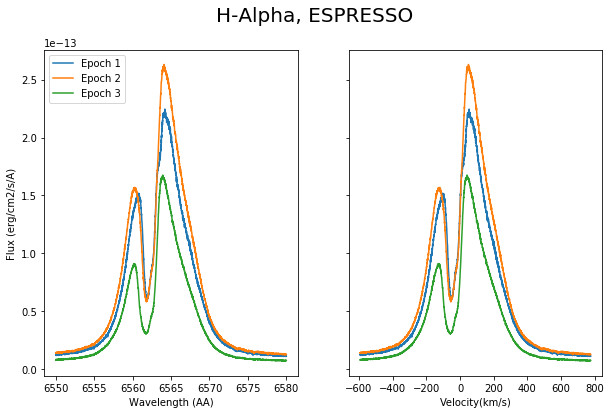

In [83]:
#h-alpha
multi_data_3(6563,6550,6580,wave_ep1,flux_ep1,"Epoch 1",wave_ep2,flux_ep2,"Epoch 2",wave_ep3,flux_ep3,"Epoch 3")
plt.suptitle("H-Alpha, ESPRESSO",fontsize=20)

Text(0.5, 0.98, '[OI]6300 ESPRESSO')

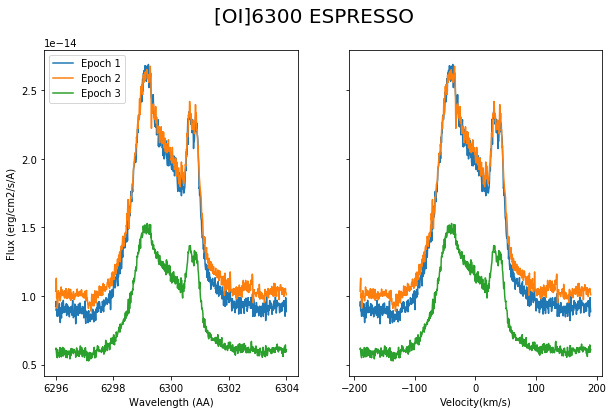

In [85]:
#OI
multi_data_3(6300,6296,6304,wave_ep1,flux_ep1,"Epoch 1",wave_ep2,flux_ep2,"Epoch 2",wave_ep3,flux_ep3,"Epoch 3")
plt.suptitle("[OI]6300 ESPRESSO",fontsize=20)

Text(0.5, 0.98, '[NI]6583 ESPRESSO')

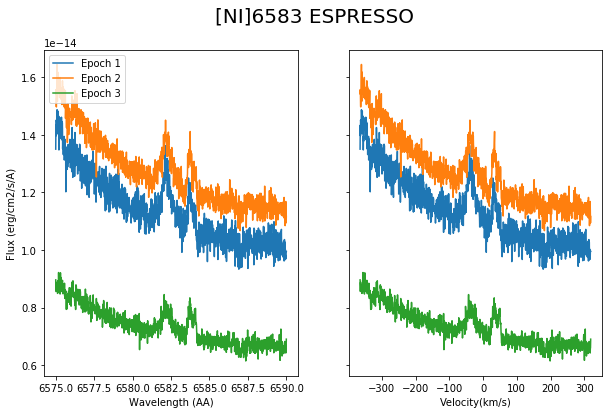

In [87]:
#NI
multi_data_3(6583,6575,6590,wave_ep1,flux_ep1,"Epoch 1",wave_ep2,flux_ep2,"Epoch 2",wave_ep3,flux_ep3,"Epoch 3")
plt.suptitle("[NI]6583 ESPRESSO",fontsize=20)

Text(0.5, 0.98, 'H-beta ESPRESSO')

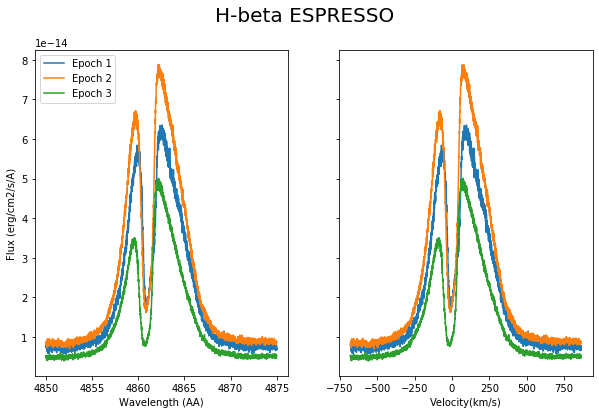

In [95]:
#Hbeta
multi_data_3(4861,4850,4875,wave_ep1,flux_ep1,"Epoch 1",wave_ep2,flux_ep2,"Epoch 2",wave_ep3,flux_ep3,"Epoch 3")
plt.suptitle("H-beta ESPRESSO",fontsize=20)

Text(0.5, 0.98, 'HeI ESPRESSO')

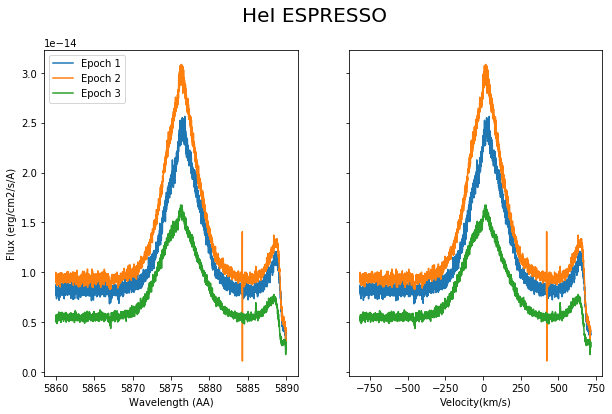

In [96]:
#HeI
multi_data_3(5876,5860,5890,wave_ep1,flux_ep1,"Epoch 1",wave_ep2,flux_ep2,"Epoch 2",wave_ep3,flux_ep3,"Epoch 3")
plt.suptitle("HeI ESPRESSO",fontsize=20)

# UVES

In [97]:
### Data input from the fits files ### 

### SO 518 epoch 1 ###
SO518_blue_ep1 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep1_fluxcomb_blue.fits")
SO518_redl_ep1 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep1_fluxcomb_redl.fits")
SO518_redu_ep1 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep1_fluxcomb_redu_tell.fits")

### SO 518 epoch 2 ###
SO518_blue_ep2 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep2_fluxcomb_blue.fits")
SO518_redl_ep2 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep2_fluxcomb_redl.fits")
SO518_redu_ep2 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep2_fluxcomb_redu_tell.fits")

### SO 518 epoch 3 ###
SO518_blue_ep3 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep3_fluxcomb_blue.fits")
SO518_redl_ep3 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep3_fluxcomb_redl.fits")
SO518_redu_ep3 = Spectrum1D.read("699-1_Project/UVES_SO/SO518_ep3_fluxcomb_redu_tell.fits")

##########

### SO 583 epoch 1 ###
SO583_blue_ep1 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep1_fluxcomb_blue.fits")
SO583_redl_ep1 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep1_fluxcomb_redl.fits")
SO583_redu_ep1 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep1_fluxcomb_redu_tell.fits")

### SO 583 epoch 2 ###
SO583_blue_ep2 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep2_fluxcomb_blue.fits")
SO583_redl_ep2 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep2_fluxcomb_redl.fits")
SO583_redu_ep2 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep2_fluxcomb_redu_tell.fits")

### SO 583 epoch 3 ###
SO583_blue_ep3 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep3_fluxcomb_blue.fits")
SO583_redl_ep3 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep3_fluxcomb_redl.fits")
SO583_redu_ep3 = Spectrum1D.read("699-1_Project/UVES_SO/SO583_ep3_fluxcomb_redu_tell.fits")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [98]:
### all 518 epoch 1 data ###

SO518_wave_blue_ep1 = SO518_blue_ep1.wavelength
SO518_flux_blue_ep1 = np.array(SO518_blue_ep1.flux)

SO518_wave_redl_ep1 = SO518_redl_ep1.wavelength
SO518_flux_redl_ep1 = np.array(SO518_redl_ep1.flux)

SO518_wave_redu_ep1 = SO518_redu_ep1.wavelength
SO518_flux_redu_ep1 = np.array(SO518_redu_ep1.flux)

SO518_ep1_wave = np.asarray(np.concatenate((SO518_wave_blue_ep1,SO518_wave_redl_ep1,SO518_wave_redu_ep1)))
SO518_ep1_flux = np.asarray(np.concatenate((SO518_flux_blue_ep1,SO518_flux_redl_ep1,SO518_flux_redu_ep1)))

In [99]:
### all 518 epoch 2 data ###

SO518_wave_blue_ep2 = SO518_blue_ep2.wavelength
SO518_flux_blue_ep2 = np.array(SO518_blue_ep2.flux)

SO518_wave_redl_ep2 = SO518_redl_ep2.wavelength
SO518_flux_redl_ep2 = np.array(SO518_redl_ep2.flux)

SO518_wave_redu_ep2 = SO518_redu_ep2.wavelength
SO518_flux_redu_ep2 = np.array(SO518_redu_ep2.flux)

SO518_ep2_wave = np.asarray(np.concatenate((SO518_wave_blue_ep2,SO518_wave_redl_ep2,SO518_wave_redu_ep2)))
SO518_ep2_flux = np.asarray(np.concatenate((SO518_flux_blue_ep2,SO518_flux_redl_ep2,SO518_flux_redu_ep2)))

In [117]:
### all 518 epoch 3 data ###

SO518_wave_blue_ep3 = np.array(SO518_blue_ep3.wavelength)
SO518_flux_blue_ep3 = np.array(SO518_blue_ep3.flux)

SO518_wave_redl_ep3 = np.array(SO518_redl_ep3.wavelength)
SO518_flux_redl_ep3 = np.array(SO518_redl_ep3.flux)

SO518_wave_redu_ep3 = np.array(SO518_redu_ep3.wavelength)
SO518_flux_redu_ep3 = np.array(SO518_redu_ep3.flux)

SO518_ep3_wave = np.asarray(np.concatenate((SO518_wave_blue_ep3,SO518_wave_redl_ep3,SO518_wave_redu_ep3)))
SO518_ep3_flux = np.asarray(np.concatenate((SO518_flux_blue_ep3,SO518_flux_redl_ep3,SO518_flux_redu_ep3)))

In [101]:
### all 583 epoch 1 data ###

SO583_wave_blue_ep1 = SO583_blue_ep1.wavelength
SO583_flux_blue_ep1 = np.array(SO583_blue_ep1.flux)

SO583_wave_redl_ep1 = SO583_redl_ep1.wavelength
SO583_flux_redl_ep1 = np.array(SO583_redl_ep1.flux)

SO583_wave_redu_ep1 = SO583_redu_ep1.wavelength
SO583_flux_redu_ep1 = np.array(SO583_redu_ep1.flux)

SO583_ep1_wave = np.asarray(np.concatenate((SO583_wave_blue_ep1,SO583_wave_redl_ep1,SO583_wave_redu_ep1)))
SO583_ep1_flux = np.asarray(np.concatenate((SO583_flux_blue_ep1,SO583_flux_redl_ep1,SO583_flux_redu_ep1)))

In [102]:
### all 583 epoch 2 data ###

SO583_wave_blue_ep2 = SO583_blue_ep2.wavelength
SO583_flux_blue_ep2 = np.array(SO583_blue_ep2.flux)

SO583_wave_redl_ep2 = SO583_redl_ep2.wavelength
SO583_flux_redl_ep2 = np.array(SO583_redl_ep2.flux)

SO583_wave_redu_ep2 = SO583_redu_ep2.wavelength
SO583_flux_redu_ep2 = np.array(SO583_redu_ep2.flux)

SO583_ep2_wave = np.asarray(np.concatenate((SO583_wave_blue_ep2,SO583_wave_redl_ep2,SO583_wave_redu_ep2)))
SO583_ep2_flux = np.asarray(np.concatenate((SO583_flux_blue_ep2,SO583_flux_redl_ep2,SO583_flux_redu_ep2)))

In [103]:
### all 583 epoch 3 data ###

SO583_wave_blue_ep3 = SO583_blue_ep3.wavelength
SO583_flux_blue_ep3 = np.array(SO583_blue_ep3.flux)

SO583_wave_redl_ep3 = SO583_redl_ep3.wavelength
SO583_flux_redl_ep3 = np.array(SO583_redl_ep3.flux)

SO583_wave_redu_ep3 = SO583_redu_ep3.wavelength
SO583_flux_redu_ep3 = np.array(SO583_redu_ep3.flux)

SO583_ep3_wave = np.asarray(np.concatenate((SO583_wave_blue_ep3,SO583_wave_redl_ep3,SO583_wave_redu_ep3)))
SO583_ep3_flux = np.asarray(np.concatenate((SO583_flux_blue_ep3,SO583_flux_redl_ep3,SO583_flux_redu_ep3)))

### Plots

/Users/mackenzie/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


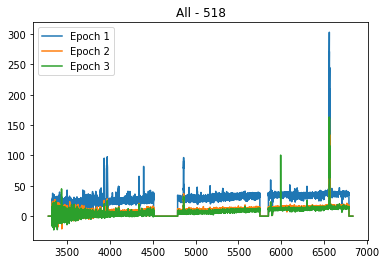

/Users/mackenzie/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


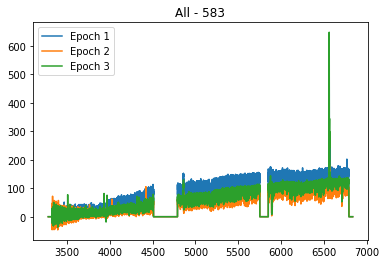

In [118]:
plt.plot(SO518_ep1_wave,SO518_ep1_flux,label='Epoch 1')
plt.plot(SO518_ep2_wave,SO518_ep2_flux,label='Epoch 2')
plt.plot(SO518_ep3_wave,SO518_ep3_flux,label='Epoch 3')
plt.legend()
plt.title('All - 518')
plt.show()

plt.plot(SO583_ep1_wave,SO583_ep1_flux,label='Epoch 1')
plt.plot(SO583_ep2_wave,SO583_ep2_flux,label='Epoch 2')
plt.plot(SO583_ep3_wave,SO583_ep3_flux,label='Epoch 3')
plt.legend()
plt.title("All - 583")
plt.show()

### Lines of interest

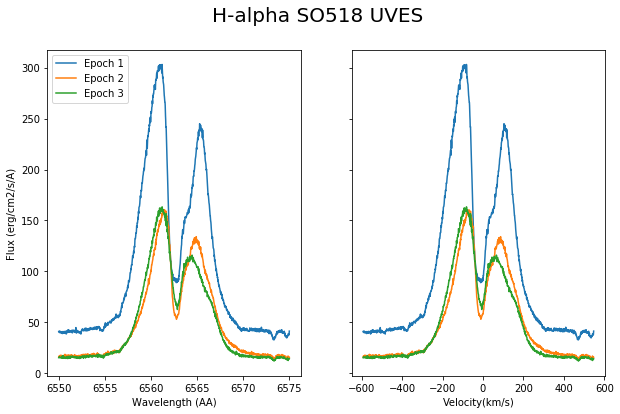

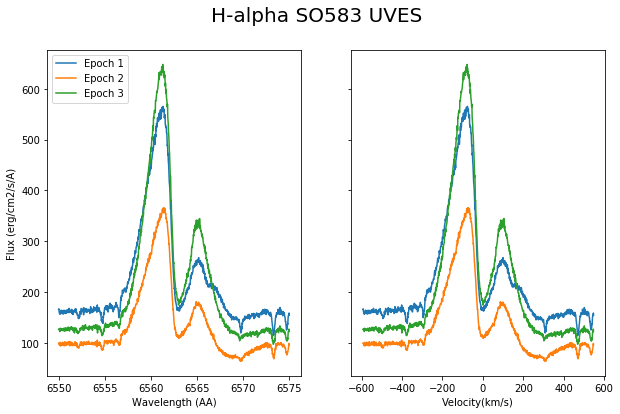

In [125]:
#H-alpha
multi_data_3(6563,6550,6575,SO518_ep1_wave,SO518_ep1_flux,"Epoch 1",SO518_ep2_wave,SO518_ep2_flux,"Epoch 2",SO518_ep3_wave,SO518_ep3_flux,"Epoch 3")
plt.suptitle("H-alpha SO518 UVES",fontsize=20)
plt.show()

multi_data_3(6563,6550,6575,SO583_ep1_wave,SO583_ep1_flux,"Epoch 1",SO583_ep2_wave,SO583_ep2_flux,"Epoch 2",SO583_ep3_wave,SO583_ep3_flux,"Epoch 3")
plt.suptitle("H-alpha SO583 UVES",fontsize=20)
plt.show()

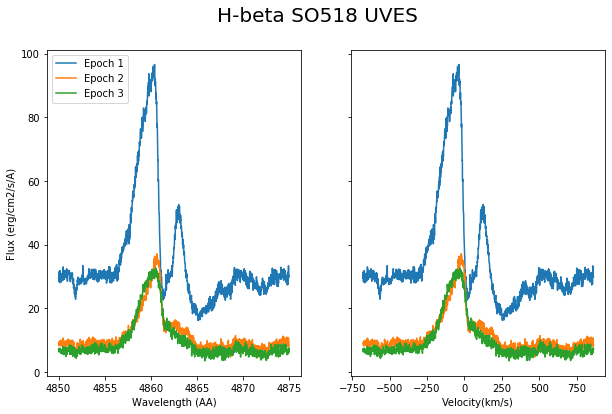

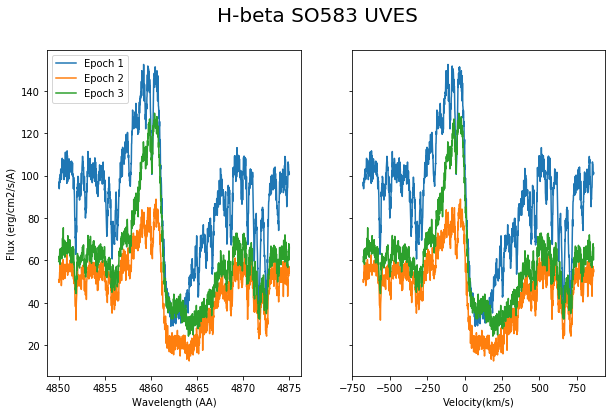

In [126]:
#H-beta
multi_data_3(4861,4850,4875,SO518_ep1_wave,SO518_ep1_flux,"Epoch 1",SO518_ep2_wave,SO518_ep2_flux,"Epoch 2",SO518_ep3_wave,SO518_ep3_flux,"Epoch 3")
plt.suptitle("H-beta SO518 UVES",fontsize=20)
plt.show()

multi_data_3(4861,4850,4875,SO583_ep1_wave,SO583_ep1_flux,"Epoch 1",SO583_ep2_wave,SO583_ep2_flux,"Epoch 2",SO583_ep3_wave,SO583_ep3_flux,"Epoch 3")
plt.suptitle("H-beta SO583 UVES",fontsize=20)
plt.show()

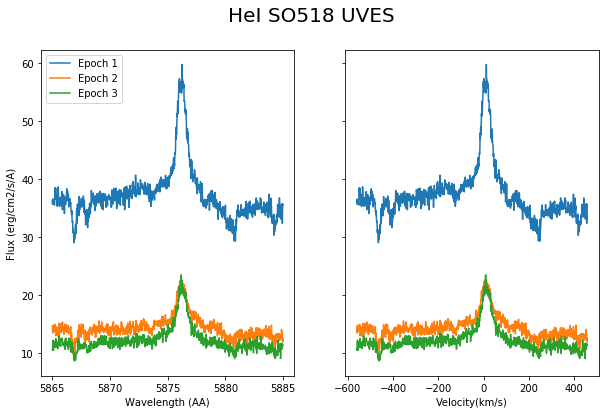

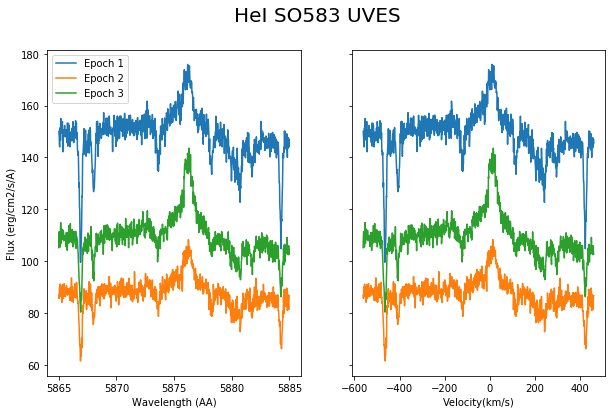

In [129]:
#HeI
multi_data_3(5876,5865,5885,SO518_ep1_wave,SO518_ep1_flux,"Epoch 1",SO518_ep2_wave,SO518_ep2_flux,"Epoch 2",SO518_ep3_wave,SO518_ep3_flux,"Epoch 3")
plt.suptitle("HeI SO518 UVES",fontsize=20)
plt.show()

multi_data_3(5876,5865,5885,SO583_ep1_wave,SO583_ep1_flux,"Epoch 1",SO583_ep2_wave,SO583_ep2_flux,"Epoch 2",SO583_ep3_wave,SO583_ep3_flux,"Epoch 3")
plt.suptitle("HeI SO583 UVES",fontsize=20)
plt.show()

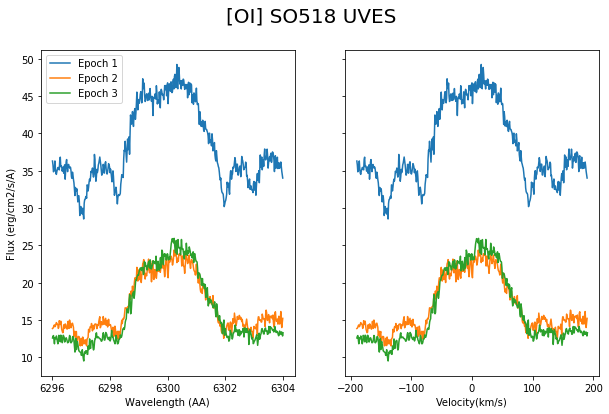

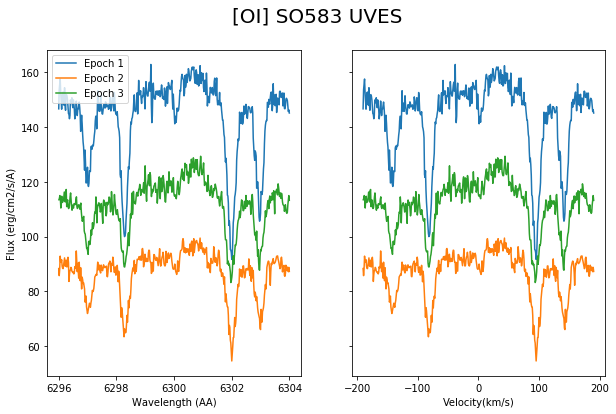

In [130]:
#OI
multi_data_3(6300,6296,6304,SO518_ep1_wave,SO518_ep1_flux,"Epoch 1",SO518_ep2_wave,SO518_ep2_flux,"Epoch 2",SO518_ep3_wave,SO518_ep3_flux,"Epoch 3")
plt.suptitle("[OI] SO518 UVES",fontsize=20)
plt.show()

multi_data_3(6300,6296,6304,SO583_ep1_wave,SO583_ep1_flux,"Epoch 1",SO583_ep2_wave,SO583_ep2_flux,"Epoch 2",SO583_ep3_wave,SO583_ep3_flux,"Epoch 3")
plt.suptitle("[OI] SO583 UVES",fontsize=20)
plt.show()

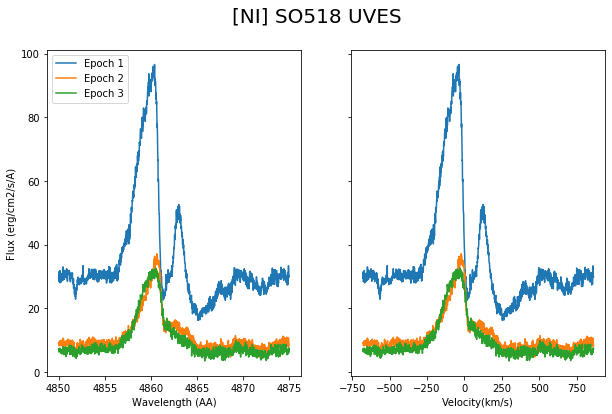

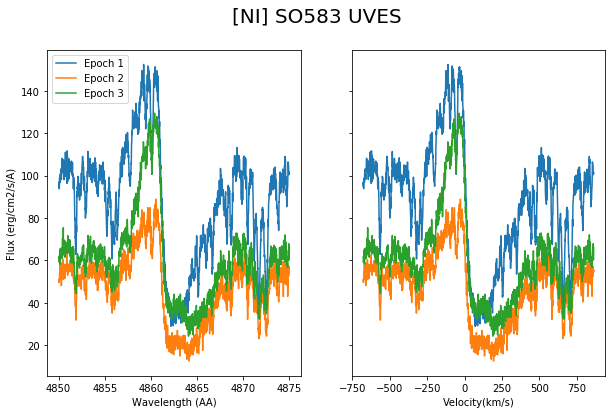

In [131]:
#NI
multi_data_3(4861,4850,4875,SO518_ep1_wave,SO518_ep1_flux,"Epoch 1",SO518_ep2_wave,SO518_ep2_flux,"Epoch 2",SO518_ep3_wave,SO518_ep3_flux,"Epoch 3")
plt.suptitle("[NI] SO518 UVES",fontsize=20)
plt.show()

multi_data_3(4861,4850,4875,SO583_ep1_wave,SO583_ep1_flux,"Epoch 1",SO583_ep2_wave,SO583_ep2_flux,"Epoch 2",SO583_ep3_wave,SO583_ep3_flux,"Epoch 3")
plt.suptitle("[NI] SO583 UVES",fontsize=20)
plt.show()